In [41]:
import sys

sys.path.append('../scripts')

In [42]:
import pandas as pd
import numpy as np
import preprocessing

In [43]:
data = pd.read_csv('../data/raw/car_price_prediction.csv')
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [44]:
import pandas as pd

# مثال: تحميل البيانات من ملف
data = pd.read_csv('../data/raw/car_price_prediction.csv')
# حذف عمود 'Levy' إن وُجد
if 'Levy' in data.columns:
    data = data.drop(columns=['Levy'])

# عرض أول 5 صفوف للتأكد
print(data.head())


         ID  Price Manufacturer    Model  Prod. year   Category  \
0  45654403  13328        LEXUS   RX 450        2010       Jeep   
1  44731507  16621    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467        HONDA      FIT        2006  Hatchback   
3  45769185   3607         FORD   Escape        2011       Jeep   
4  45809263  11726        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May    

In [45]:
data = preprocessing.preprocessing_pipeline(data)

Preprocessing started...
Initial shape: (16662, 17)
After dropping duplicates: (16404, 17)
Replacing categorical values...
After cleaning outliers: (14135, 17)
Feature engineering...
Dropping columns...
Final shape: (14135, 15)


In [46]:
data.head()

,Price,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,15
1,16621,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,14
2,8467,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,19
3,3607,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,14
4,11726,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,11


In [47]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

one_hot_columns = ['Leather interior', 'Gear box type', 'Drive wheels', 'Wheel']

# data = pd.get_dummies(data, columns=one_hot_columns)

oh_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
oh_encoded_train = oh_encoder.fit_transform(data[one_hot_columns])

oh_encoded_columns = oh_encoder.get_feature_names_out(one_hot_columns)


In [48]:
oh_encoded_train_df = pd.DataFrame(oh_encoded_train, columns=oh_encoded_columns, index=data.index)


In [49]:
data = pd.concat([data, oh_encoded_train_df], axis=1)
data.drop(columns=one_hot_columns, inplace=True)

In [50]:
import pickle
# Save the encoder for future use
with open('../models/one_hot_encoder.pkl', 'wb') as f:
    pickle.dump(oh_encoder, f)

In [51]:
label_encode_columns = ['Manufacturer', 'Model', 'Category', 'Fuel type', 'Color']

label_encoders = {}
for column in label_encode_columns:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])
    label_encoders[column] = label_encoder

In [52]:
# Save the label encoders for future use
with open('../models/label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

In [53]:
X = data.drop('Price', axis=1)
y = data['Price']

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print(f"Train set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")

Train set: 12014 samples
Test set: 2121 samples


In [55]:
from sklearn.discriminant_analysis import StandardScaler

numerical_columns = [ 'Engine volume', 'Mileage', 'Age']

scaler = StandardScaler()
X_train[numerical_columns]= scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [56]:
# Save the scaler
with open('../models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [57]:
X_train

,Manufacturer,Model,Category,Fuel type,Engine volume,Mileage,Cylinders,Color,Airbags,Age,...,Leather interior_Yes,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Wheel_Left wheel,Wheel_Right-hand drive
9018,55,953,2,5,-0.532087,0.421179,4.0,2,0,2.425693,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8810,37,1285,4,0,-0.196822,0.511886,4.0,1,6,1.176070,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
10099,52,250,9,2,0.641339,-1.652112,4.0,14,12,-0.787623,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2967,20,548,9,5,-0.867351,-0.422261,4.0,12,4,-0.073553,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5687,50,630,4,5,0.641339,-0.601757,4.0,12,0,-0.787623,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6100,20,1121,9,4,-0.196822,-0.496498,4.0,12,4,0.104965,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
15829,32,290,9,5,-0.532087,-0.279736,4.0,14,12,-0.609105,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6342,32,283,1,4,-0.532087,0.421179,4.0,5,6,1.354588,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1007,49,1046,4,1,-0.196822,-0.183081,4.0,14,4,-0.073553,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [58]:
X_train.columns

Index(['Manufacturer', 'Model', 'Category', 'Fuel type', 'Engine volume',
       'Mileage', 'Cylinders', 'Color', 'Airbags', 'Age',
       'Leather interior_No', 'Leather interior_Yes',
       'Gear box type_Automatic', 'Gear box type_Manual',
       'Gear box type_Tiptronic', 'Gear box type_Variator', 'Drive wheels_4x4',
       'Drive wheels_Front', 'Drive wheels_Rear', 'Wheel_Left wheel',
       'Wheel_Right-hand drive'],
      dtype='object')

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)
rmse = root_mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Root Mean Squared Error: 5015.000078600056
R^2 Score: 0.7692708642955184


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
best_rf = grid.best_estimator_


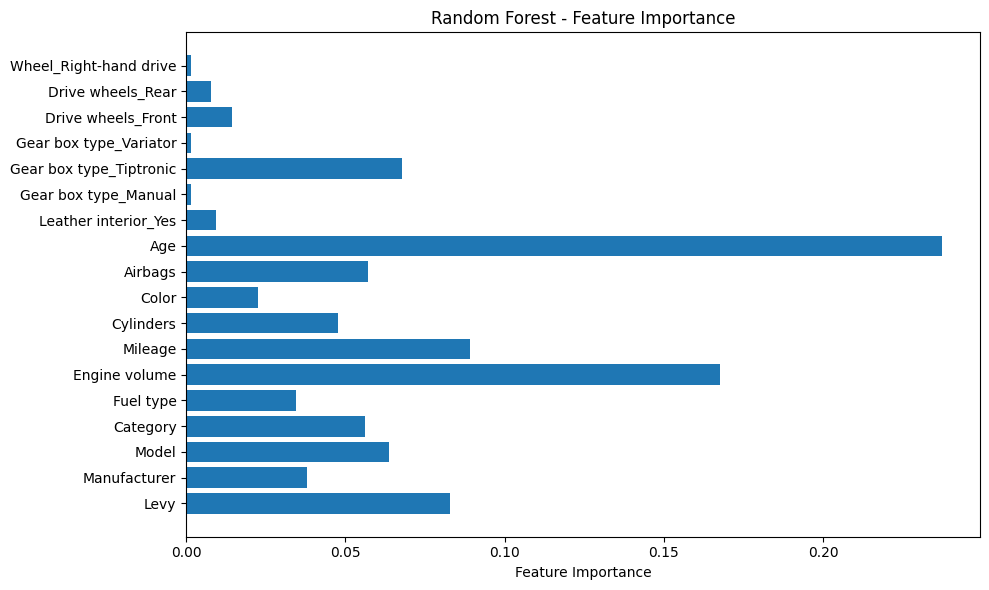

In [35]:
import matplotlib.pyplot as plt

importances = best_rf.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importance")
plt.tight_layout()
plt.show()


In [36]:
# Save the label encoders for future use
with open('../models/model.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# ملاحظة: تأكد أن data تحتوي فقط على القيم الرقمية بعد الترميز

X = data.drop('Price', axis=1)
y = data['Price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# 1. Load and clean your data
data = pd.read_csv('../data/raw/car_price_prediction.csv')
data.drop_duplicates(inplace=True)

# 2. Replace and convert columns
data['Engine volume'] = data['Engine volume'].str.replace('Turbo', '', regex=False).astype(float)
data['Mileage'] = data['Mileage'].str.replace('km', '', regex=False).str.replace(',', '', regex=False).astype(float)

# 3. Feature engineering
data['Age'] = pd.Timestamp.now().year - data['Prod. year']

# 4. Drop unused columns
data.drop(columns=['ID', 'Doors', 'Prod. year', ], inplace=True, errors='ignore')

# 5. Label encode high-cardinality categorical columns
label_cols = ['Manufacturer', 'Model', 'Category', 'Fuel type', 'Color']
for col in label_cols:
    data[col] = LabelEncoder().fit_transform(data[col].astype(str))

# 6. One-hot encode low-cardinality categorical columns
one_hot_cols = ['Leather interior', 'Gear box type', 'Drive wheels', 'Wheel']
data = pd.get_dummies(data, columns=one_hot_cols, drop_first=True)

# 7. Split data
X = data.drop('Price', axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Scale numerical features
numeric_cols = ['Engine volume', 'Mileage', 'Age']
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 9. Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

# 10. Train, predict and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))  # استبدل هنا
    r2 = r2_score(y_test, preds)

    print(f"\n📊 {name}")
    print(f"MAE : {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²  : {r2:.4f}")



📊 Linear Regression
MAE : 9858.44
RMSE: 19956.46
R²  : 0.1798

📊 Random Forest
MAE : 4202.45
RMSE: 14824.22
R²  : 0.5474

📊 XGBoost
MAE : 5572.27
RMSE: 14582.90
R²  : 0.5620


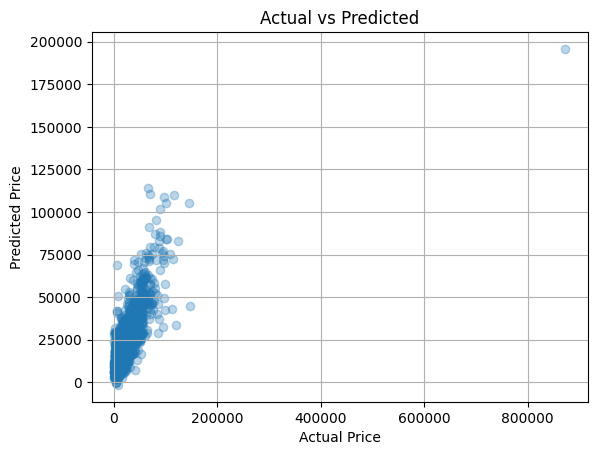

In [39]:
import matplotlib.pyplot as plt

plt.scatter(y_test, model.predict(X_test), alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.grid()
plt.show()
